In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

In [2]:
def cal_col(data):
    num_col = data.select_dtypes(include=['float64','int64']).columns
    col = data.columns
    return col,num_col

In [3]:
def calculating_iqr(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    q2 = q3 - q1
    upper = q3 + (1.5 * q2)
    lower = q1 - (1.5 * q2)
    return lower,upper

In [4]:
handle_outliers = lambda x: lower if x < lower else(upper if x > upper else x)

In [5]:
def cal_corr(num_col,data,ann = True):
    corr = data[num_col].corr()
    sns.heatmap(data = corr, annot = ann)  
    plt.show()

In [6]:
df = pd.read_csv("diamonds.csv")

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
col,num_col = cal_col(df)

In [12]:
for i in col:
    print(f"{i}:")
    print(df[i].nunique())
    print(df[i].unique())

carat:
273
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.7

In [13]:
df = df.drop_duplicates()

In [14]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
con = (df['x'] == 0)| (df['y'] == 0) | (df['z'] == 0)
df = df.drop(df[con].index)
df.shape

(53775, 10)

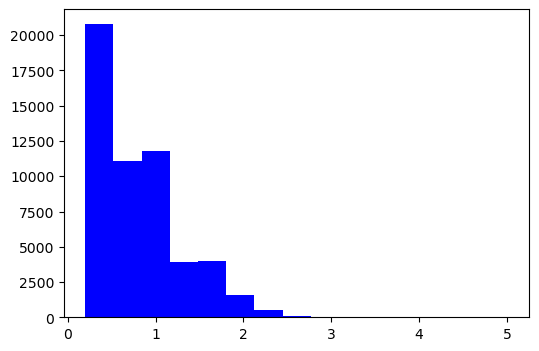

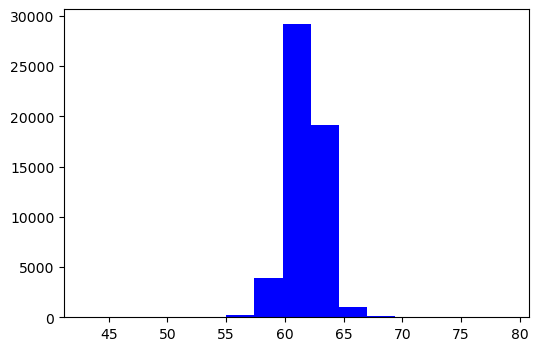

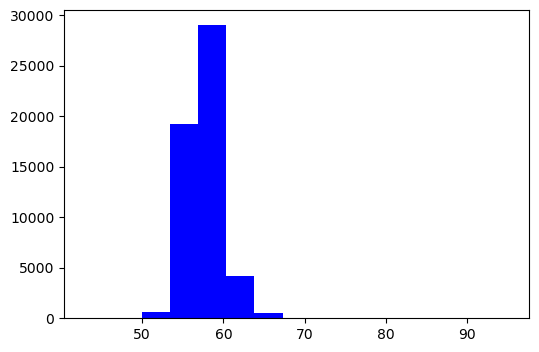

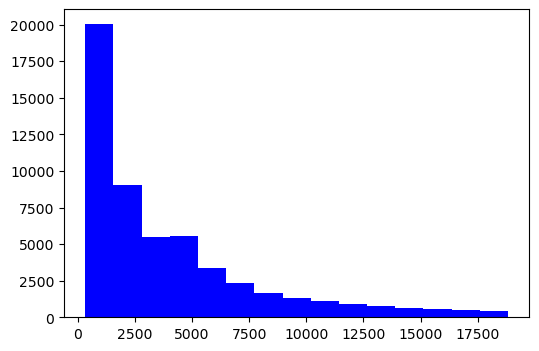

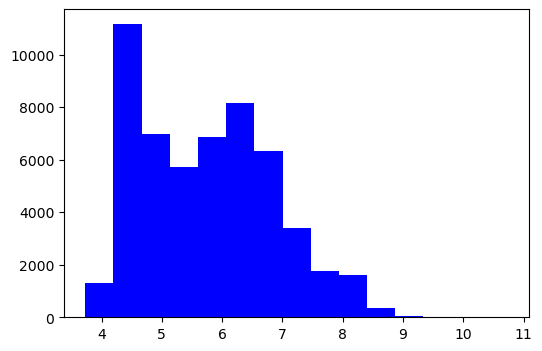

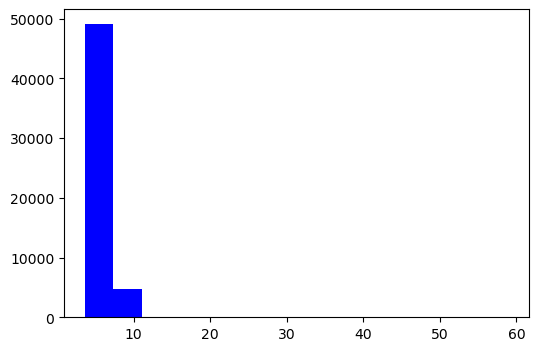

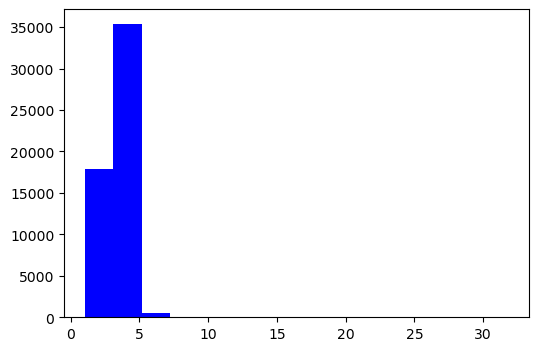

In [16]:
for c in num_col:
    plt.figure(figsize=(6, 4))
    plt.hist(df[c],bins = 15,color= 'blue')
    plt.show()

In [17]:
n_col = num_col.drop('price')
n_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

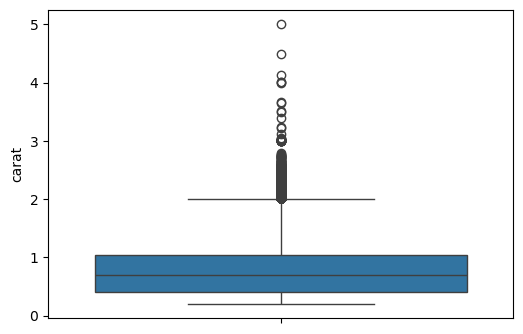

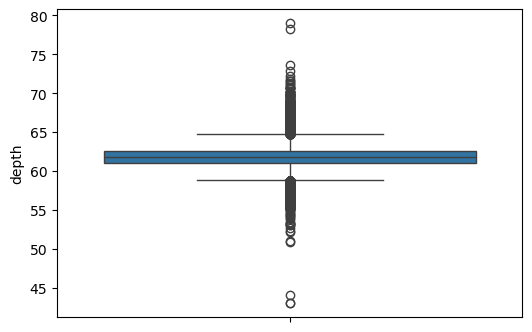

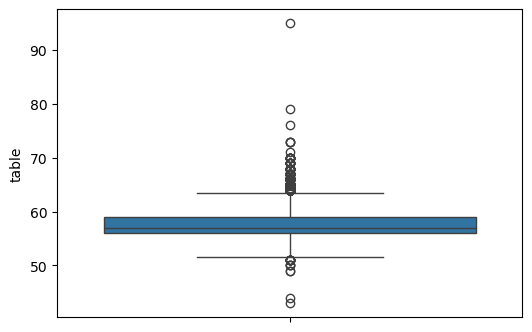

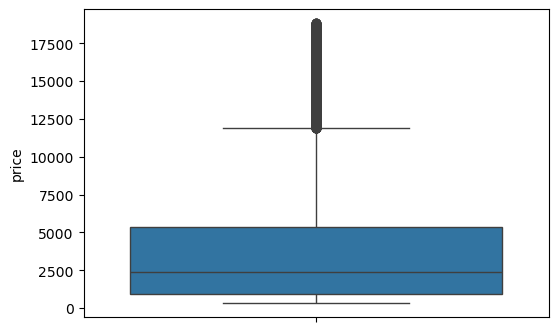

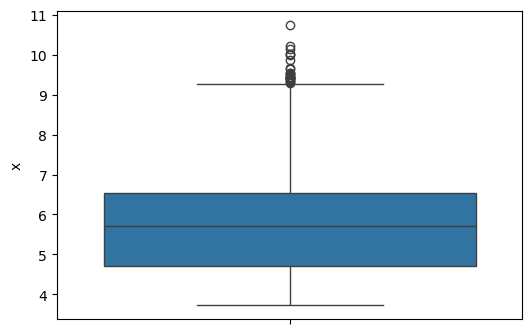

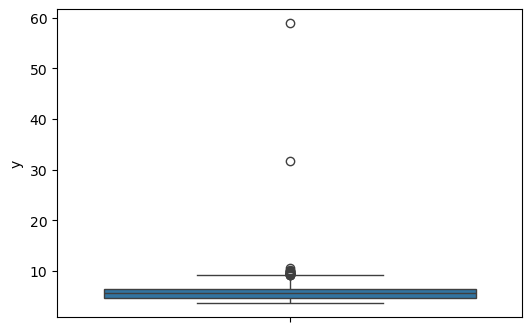

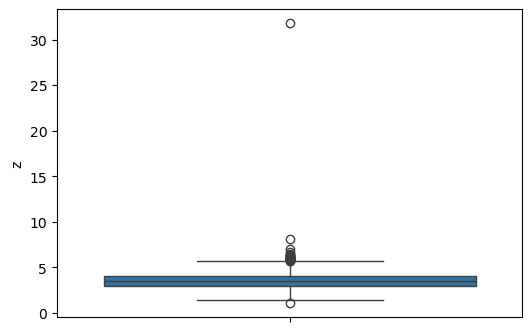

In [18]:
for c in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data= df[c])
    plt.show()

In [19]:
# handling outliers except price column
#cond = pd.Series(True,index = df.index)
#for i in n_col:
   #lower,upper = calculating_iqr(df,i)
   #cond &= (df[i] > lower) & (df[i] < upper)
#df = df[cond]
#df.shape


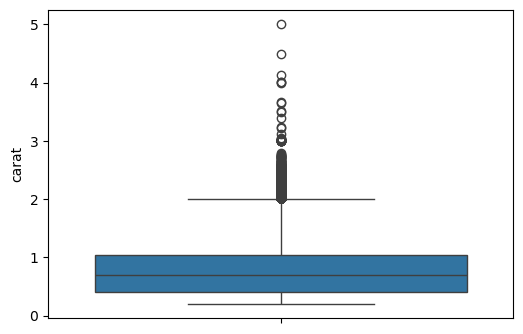

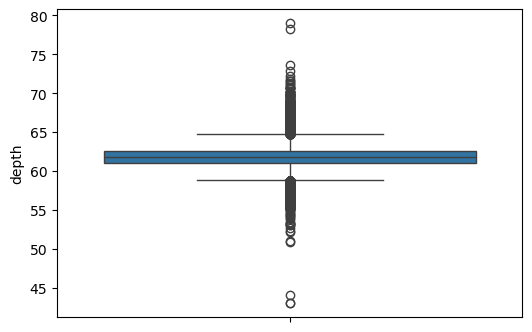

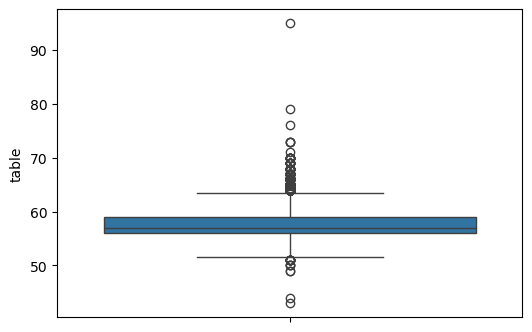

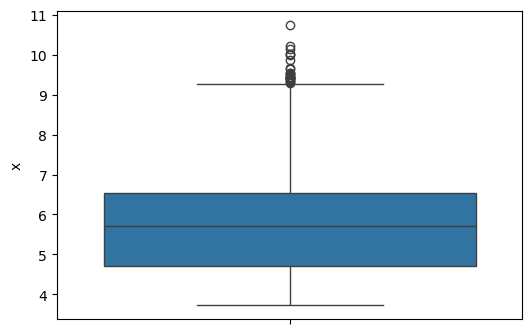

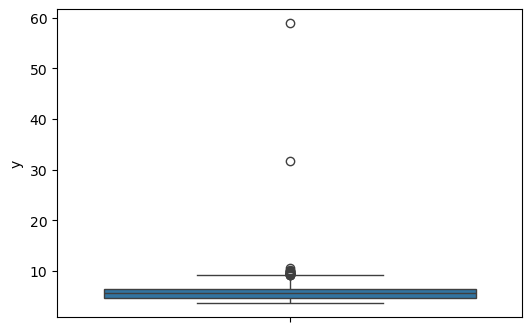

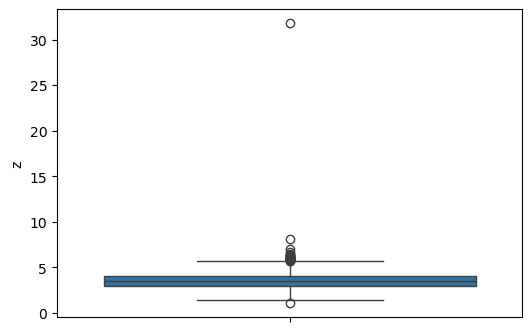

In [20]:
for c in n_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data= df[c])
    plt.show()

In [21]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
cat_col = ['cut','color','clarity']

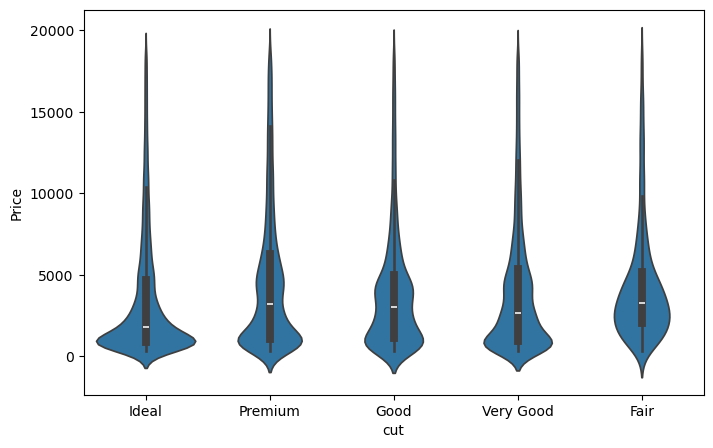

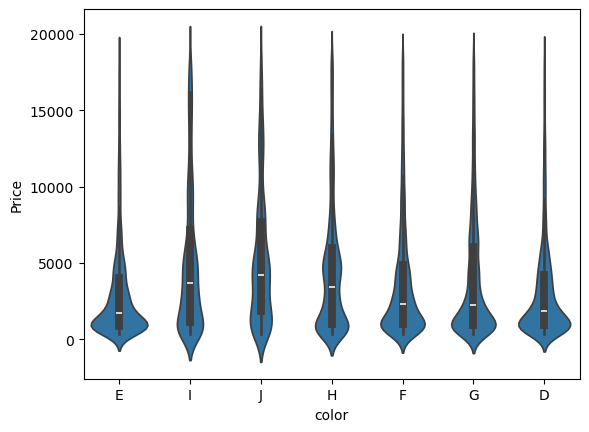

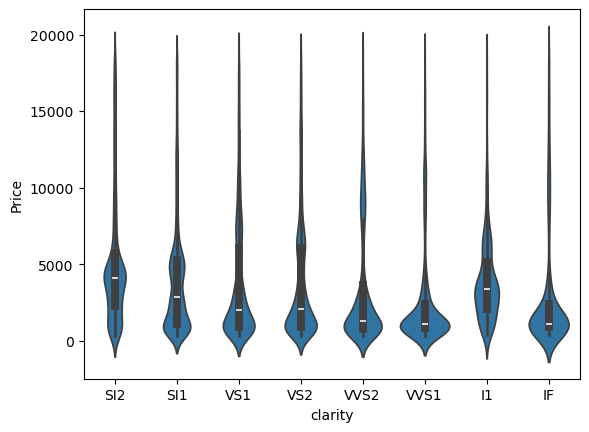

In [23]:
plt.figure(figsize =(8,5))
for c in cat_col:
    sns.violinplot(x = c, y = 'price',data = df)
    plt.xlabel(f'{c}')
    plt.ylabel('Price')
    plt.show()

* As the median differs from variable to another in each categorical variable then there is a relation between them and the price column

### Apply encoding

In [26]:
# apply oridinal encoding
cut_mapping = {'Fair': 1, 'Good':2, 'Very Good':3, 'Premium':4,'Ideal':5}
df = df.replace({'cut':cut_mapping})
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
# apply oridinal encoding
color_mapping = {'J': 1, 'I':2, 'H':3, 'G':4,'F':5, 'E':6, 'D':7}
df = df.replace({'color':color_mapping})
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
# apply oridinal encoding
clarity_mapping = {'I1': 1, 'SI2':2, 'SI1':3, 'VS2':4,'VS1':5, 'VVS2':6, 'VVS1':7,'IF':8}
df = df.replace({'clarity':clarity_mapping})
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Correlation and Plotting

In [30]:
col,num_col = cal_col(df)

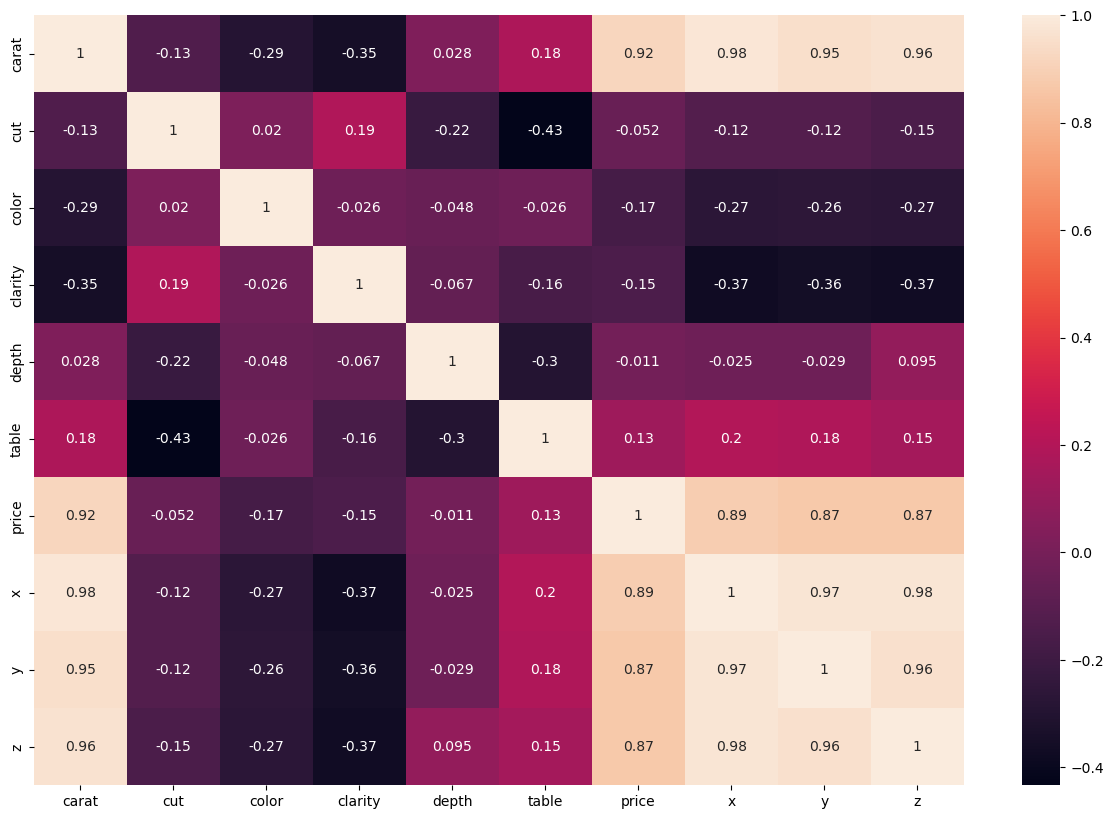

In [31]:
plt.figure(figsize=(15, 10))
cal_corr(num_col,df)

#### plotting 

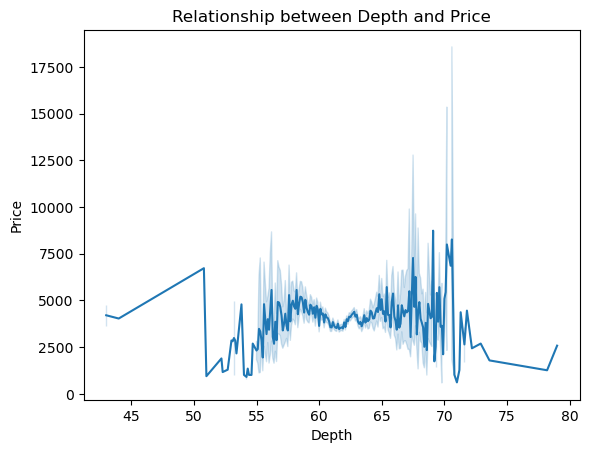

In [33]:
sns.lineplot(x= 'depth', y='price', data=df)
plt.title("Relationship between Depth and Price")
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

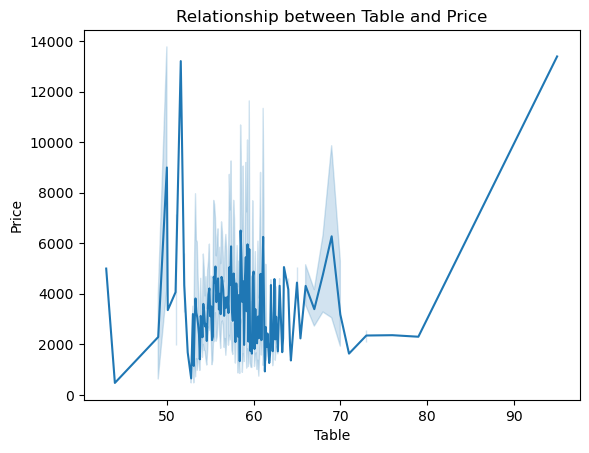

In [34]:
sns.lineplot(x= 'table', y='price', data=df)
plt.title("Relationship between Table and Price")
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

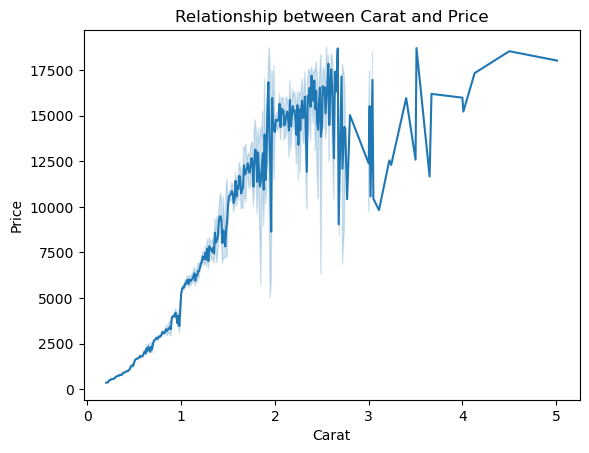

In [35]:
sns.lineplot(x= 'carat', y='price', data=df)
plt.title("Relationship between Carat and Price")
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

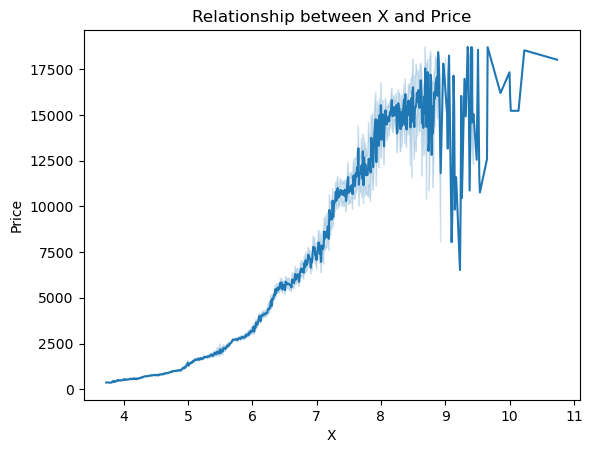

In [36]:
sns.lineplot(x= 'x', y='price', data=df)
plt.title("Relationship between X and Price")
plt.xlabel('X')
plt.ylabel('Price')
plt.show()

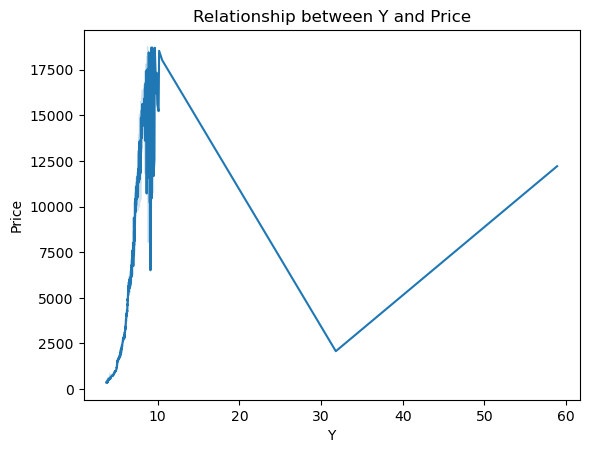

In [37]:
sns.lineplot(x= 'y', y='price', data=df)
plt.title("Relationship between Y and Price")
plt.xlabel('Y')
plt.ylabel('Price')
plt.show()

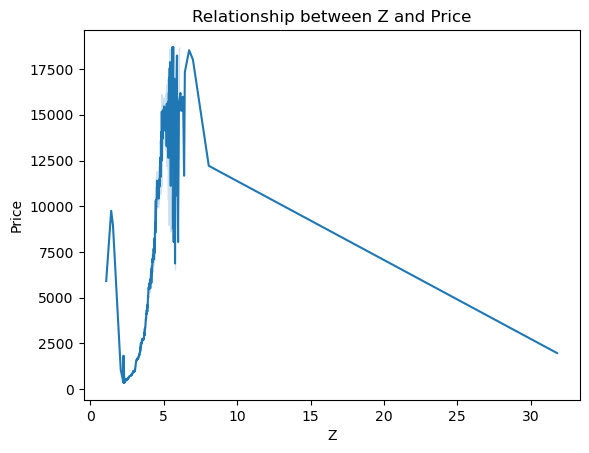

In [38]:
sns.lineplot(x= 'z', y='price', data=df)
plt.title("Relationship between Z and Price")
plt.xlabel('Z')
plt.ylabel('Price')
plt.show()

from the previous results we will found that there is non-linear relationships with other columns so we don't remove them

In [40]:
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply scaling 

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# Standardization
c_scal = X_train.columns
scaler = StandardScaler()
X_train[c_scal] = scaler.fit_transform(X_train[c_scal])
X_test[c_scal] = scaler.transform(X_test[c_scal])

### Applying models

#### Linear regression 

In [46]:
lin = LinearRegression()

In [47]:
lin.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lin.predict(X_test)

In [49]:
test_r2 = r2_score(y_test, y_pred)
test_r2

0.9070159601427601

In [50]:
print ('training accuracy: ',lin.score(X_train,y_train))
print ('test accuracy: ',lin.score(X_test,y_test))

training accuracy:  0.9073291854642137
test accuracy:  0.9070159601427601


#### Polynomial Regression

In [52]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [53]:
lin_poly = LinearRegression()

In [54]:
lin_poly.fit(X_poly, y_train)

LinearRegression()

In [55]:
X_test_poly = poly.transform(X_test)

In [56]:
y_pred_poly = lin_poly.predict(X_test_poly)

In [57]:
test_r2_poly = r2_score(y_test, y_pred_poly)
test_r2_poly

0.9631692490260617

In [58]:
print ('training accuracy: ',lin_poly.score(X_poly,y_train))
print ('test accuracy: ',lin_poly.score(X_test_poly,y_pred_poly))

training accuracy:  0.9651527876200273
test accuracy:  1.0


#### Decision Tree Regressor

In [60]:
dsr = DecisionTreeRegressor(random_state=42)
dsr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
y_pred_dsr = dsr.predict(X_test)

In [62]:
test_r2_dsr = r2_score(y_test, y_pred_poly)
test_r2_dsr

0.9631692490260617

In [63]:
print ('training accuracy: ',dsr.score(X_train,y_train))
print ('test accuracy: ',dsr.score(X_test,y_pred_dsr))

training accuracy:  0.9999950644448035
test accuracy:  1.0


#### KNN Regressor

In [65]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 10


In [66]:
knnr = KNeighborsRegressor(n_neighbors=2)
knnr.fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

In [67]:
Knn_mse = mean_squared_error(y_test,y_pred_knnr)
Knn_mse

579899.7752905625

In [68]:
test_r2_knn = r2_score(y_test, y_pred_poly)
test_r2_knn

0.9631692490260617

In [69]:
print ('training accuracy: ',knnr.score(X_train,y_train))
print ('test accuracy: ',knnr.score(X_test,y_pred_knnr))

training accuracy:  0.988488489064449
test accuracy:  1.0
